In [3]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import seaborn as sns
from matplotlib import colormaps
from result import *
from adjustText import adjust_text

def load_pkl(path):
    with open(path, 'rb') as file:
        loaded_dict = pickle.load(file)
    return loaded_dict

FILTERING_S_ALG = ['S_LONGEST', 'S_EARLIEST', 'S_RANDOM','SD_OUR']
FILTERING_C_ALG = ['C_EARLIEST', 'C_RANDOM', 'C_OUR']
FILTERING_UE_ALG = ['SS_LONGEST', 'SS_RANDOM']
FILTERING_ACCESS_OPPORTUNITIES_ALG = ['4', 'x8', 'x12']
FILTER_MAX_AND_MIN = True
FILTER_PERCENT = 1


directory_path = './'
result = {}

# Loop through the files in the directory
for filename in os.listdir(directory_path):
    # Check if the file ends with .pkl
    if filename.endswith('.pkl'):
        print(filename)
        source_alg = filename[:-4].split('|')[0]
        candidate_alg = filename[:-4].split('|')[1]
        ue_alg = filename[:-4].split('|')[2]
        access_opportunities = filename[:-4].split('|')[3]
        if (source_alg in FILTERING_S_ALG
        and candidate_alg in FILTERING_C_ALG
        and ue_alg in FILTERING_UE_ALG
        and access_opportunities in FILTERING_ACCESS_OPPORTUNITIES_ALG):
            result[(source_alg, candidate_alg, ue_alg, access_opportunities)] = load_pkl(filename)
            result[(source_alg, candidate_alg, ue_alg, access_opportunities)]['time_sat_matrix'] = np.array(result[(source_alg, candidate_alg, ue_alg, access_opportunities)]['time_sat_matrix'])

result = prepare_result(result, FILTER_MAX_AND_MIN, FILTER_PERCENT)

SD_OUR|C_OUR|SS_RANDOM|1.pkl
Those with small max signalling
('SD_OUR', 'C_OUR', 'SS_RANDOM', '1')
Those with large max signalling
('SD_OUR', 'C_OUR', 'SS_RANDOM', '1')


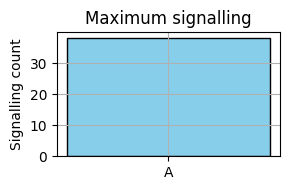

The total signalling: the lower, the better


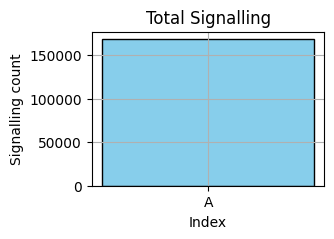

busy time slot shares: the lower, the better


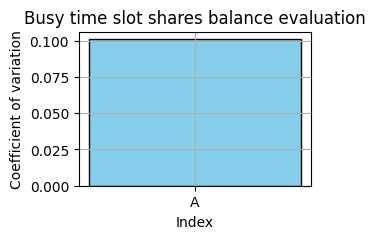

busy time slot signalling count confidence interval: the lower, the better
Total reservation time: the lower, the better


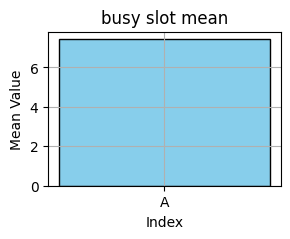

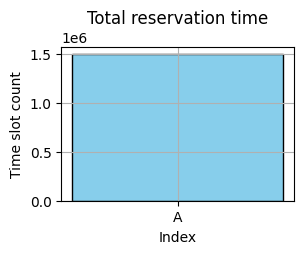

Reservation time balance: the lower the better


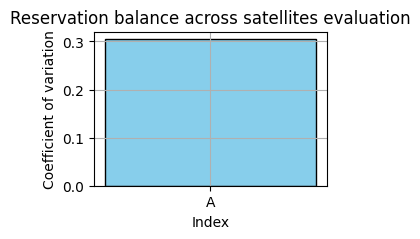

UE average access time: the lower, the better


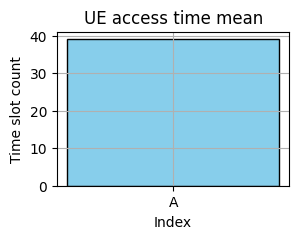

UE access time balance: the lower, the better


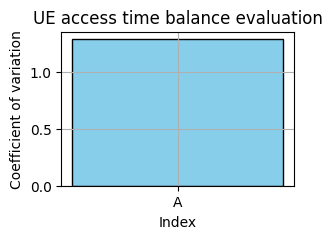

In [4]:
draw_prepared_result(result)

In [ ]:
# # The figure describes the maximum signalling of each satellite
# draw_max_signalling(result)
# draw_cumulative_load_each_time(result)
# draw_total_load_each_satellite(result)
# draw_busy_hour_distribution(result)
# draw_max_reservation(result)
# draw_heatmap(result, 100)

In [12]:
result[('SD_OUR',
  'C_OUR',
  'SS_RANDOM',
  '1')]['time_sat_matrix']

array([[ 3,  6,  3, ...,  0,  0,  0],
       [20, 37, 15, ...,  0,  0,  0],
       [ 2,  6,  2, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])